##### 토픽 모델링
##### LDA : 문서 컬렉션에서 숨겨진 주제를 찾아내는 생성 모델
    - document : 여러 topics의 혼합
    - topic : 여러 word의 분포
    - word : 특정 topic에서 생성된 단어
    - 문서들은 topic의 혼합으로 구성
        - 뉴스기사
            - 70% 정치 20%경제 10% 스포츠
        - 토픽은 단어 분포를 갖는다.
            - 정치 {선거:0.2 대통령:0.15 정부:0.1 ...}
            - 경제 {주식:0.25, 금리:0.2, 은행:0.15} 
    - 모든 문서를 토픽의 혼합, 토픽별 단어 분포를 랜덤하게 초기화
        - 과정을 반복하면 
            - 각 단어가 어떤 토픽에서 나왔는지 추정
            - 각 문서의 토픽비율을 업데이트
            - 각 토픽의 단어 분포를 업데이트

In [16]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt

documents = [
    "Python 프로그래밍은 매우 강력하고 배우기 쉬워요",
    "머신러닝은 인공지능의 핵심 기술입니다",
    "자연어처리는 NLP라고도 불립니다",
    "딥러닝은 신경망을 이용한 학습 방법입니다",
    "데이터 분석은 통계학에 기반합니다",
    "파이썬으로 머신러닝 모델을 만들 수 있습니다",
    "인공지능 기술은 빠르게 발전하고 있습니다",
    "자연어처리 모델은 텍스트를 이해할 수 있어요"
]
from konlpy.tag import Okt

# 단어 벡터화
cv = CountVectorizer(
    max_features=50,
    stop_words=['은','는','이','가','을','를','그','그리고'],
    min_df =1,
    max_df=0.9
)
doc_term_matrix =cv.fit_transform(documents)
feature_names = cv.get_feature_names_out()
print(f'문서 단어 행렬: {doc_term_matrix.shape}')
print(f'단어목록: {feature_names} 단어목록 개수 : {len(feature_names)}')

문서 단어 행렬: (8, 36)
단어목록: ['nlp라고도' 'python' '강력하고' '기반합니다' '기술은' '기술입니다' '데이터' '딥러닝은' '만들' '매우'
 '머신러닝' '머신러닝은' '모델은' '모델을' '발전하고' '방법입니다' '배우기' '분석은' '불립니다' '빠르게' '쉬워요'
 '신경망을' '이용한' '이해할' '인공지능' '인공지능의' '있습니다' '있어요' '자연어처리' '자연어처리는' '텍스트를'
 '통계학에' '파이썬으로' '프로그래밍은' '학습' '핵심'] 단어목록 개수 : 36


In [17]:
# LDA 모델 생성
lda_model =  LatentDirichletAllocation(
    n_components=3  # 토픽(주제) 개수
    ,random_state=42
    ,max_iter=20
    ,learning_method='online'   # batch (모든데이터를 한번에 다써서 한번학습), online(미니배치)
)
# 모델 학습
lda_output = lda_model.fit_transform(doc_term_matrix)
print(f'문서-주제 행렬 : {lda_output.shape}')
print(f'첫번째 문서의 주제 분포')
print(f'Topic 0: {lda_output[0,0]:.4f}')
print(f'Topic 1: {lda_output[0,1]:.4f}')
print(f'Topic 2: {lda_output[0,2]:.4f}')

# 각 주제별로 상위 단어 출력
def display_topic(model, feature_nams, n_top_words = 5):
    print(f'각 주제별 상위 단어----')
    for topic_idx, topic in enumerate(model.components_):
        # 가장 높은 가중치를 가진 단어의 인덱스 호출
        top_words_idx = topic.argsort()[-n_top_words:][::-1]
        top_words = [ feature_nams[i] for i in top_words_idx]
        top_weights = [ topic[i] for i in top_words_idx ]
        print(f'[topic {topic_idx}]')
        for word,weight in zip(top_words,top_weights):
            print(f'  {word} : {weight:.4f}')
        print()
display_topic(lda_model, feature_names,n_top_words=5)

문서-주제 행렬 : (8, 3)
첫번째 문서의 주제 분포
Topic 0: 0.0481
Topic 1: 0.0483
Topic 2: 0.9036
각 주제별 상위 단어----
[topic 0]
  기술은 : 1.3185
  모델은 : 1.3178
  핵심 : 1.3125
  인공지능 : 1.3124
  기술입니다 : 1.3116

[topic 1]
  있습니다 : 1.3128
  모델을 : 1.3109
  데이터 : 1.3104
  분석은 : 1.3095
  머신러닝 : 1.3091

[topic 2]
  매우 : 1.3191
  강력하고 : 1.3182
  python : 1.3135
  nlp라고도 : 1.3131
  배우기 : 1.3099



In [18]:
# 각 문서의 주요 주제
print(f'각문서의 주요 주제------------')
for doc_idx, doc in enumerate(lda_output):
    main_topic = np.argmax(doc)
    confidence = doc[main_topic]
    print(f'문서:{doc_idx} topic: {main_topic} 비율 : {confidence:.4f}')
    print(f'원문 : {documents[doc_idx]}')
    print()    

각문서의 주요 주제------------
문서:0 topic: 2 비율 : 0.9036
원문 : Python 프로그래밍은 매우 강력하고 배우기 쉬워요

문서:1 topic: 0 비율 : 0.8650
원문 : 머신러닝은 인공지능의 핵심 기술입니다

문서:2 topic: 2 비율 : 0.8312
원문 : 자연어처리는 NLP라고도 불립니다

문서:3 topic: 2 비율 : 0.8876
원문 : 딥러닝은 신경망을 이용한 학습 방법입니다

문서:4 topic: 1 비율 : 0.8655
원문 : 데이터 분석은 통계학에 기반합니다

문서:5 topic: 1 비율 : 0.8867
원문 : 파이썬으로 머신러닝 모델을 만들 수 있습니다

문서:6 topic: 0 비율 : 0.8855
원문 : 인공지능 기술은 빠르게 발전하고 있습니다

문서:7 topic: 0 비율 : 0.8876
원문 : 자연어처리 모델은 텍스트를 이해할 수 있어요



In [19]:
# 청와대 국민청원 데이터로드
import os
import urllib.request
import ssl
url = 'https://s3.ap-northeast-2.amazonaws.com/data10902/petition/petition_sampled.csv'

# ssl 인증서 무시
ssl._create_default_https_context = ssl._create_unverified_context

urllib.request.urlretrieve(url,'./sample.csv')

('./sample.csv', <http.client.HTTPMessage at 0x22af3d3b810>)

In [24]:
import pandas as pd
df = pd.read_csv("sample.csv", nrows=1000)
df.head()

,article_id,start,end,answered,votes,category,title,content
0,58,2017-08-19,2017-11-17,0,21,일자리,국토교통부와 한국주택협회가 행한 부당한 행위와 권력남용에 대한 내용을 청원드립니다.,안녕하세요? 존경하고 지지하는 문재인 대통령님!\n저는 성남시 분당구 정자동 주택전...
1,63,2017-08-20,2017-09-04,0,1,보건복지,살려주세요..,안녕하십니까?\n저는 올해 63세된 홀로 사는 늙은 여자입니다...\n작년 중복날 ...
2,136,2017-08-20,2017-11-18,0,4,육아/교육,고등학교 교육 내용 수준을 낮춰주시고 실용적인 내용을 담아주세요!,저는 광주에 사는 중3 학생입니다. 고등학교 가기 직전의 학년이라 어느 때보다 고등...
3,141,2017-08-20,2017-08-27,0,0,기타,한국문화에 창조적요소를 심자,안녕하십니까\n저는 92년 한국을 알게된 종국동포 입니다.\n[저는 한 중소기업에...
4,148,2017-08-20,2017-11-18,0,7,외교/통일/국방,다문화정책 및 할랄 인증 제도,대한민국과 국민을 위해 밤낮 없이 수고하시는 대통령을 비롯한 위정자 분들께\n대한민...


In [25]:
df.shape

(1000, 8)

In [27]:
# 한국어 전처리
from sklearn.feature_extraction.text import CountVectorizer
from konlpy.tag import Okt
okt = Okt()
# 명사만, 그리고 한글자 이상만
def tokenizer(doc):
    return [token for token in okt.nouns(doc) if len(token) > 1]

cv = CountVectorizer(
    max_features=1000,
    min_df = 5,
    max_df = 0.5,
    tokenizer=tokenizer
)
pet_cv = cv.fit_transform(df.content)
print(f'countvectorize 형태 : {pet_cv.shape}')

countvectorize 형태 : (1000, 1000)


In [33]:
# LDA 모델 학습
from sklearn.decomposition import LatentDirichletAllocation
import time
# 시간측정
start_time = time.time()
lda = LatentDirichletAllocation(n_components=15
                          ,n_jobs=-1
                          ,random_state=42
                          )
pet_topics = lda.fit_transform(pet_cv)
elapsed_time = time.time() - start_time
print(f'lda 학습시간 : {elapsed_time:.2f}초')


lda 학습시간 : 0.55초


In [34]:
# 토픽단어 출력함수
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic #{topic_idx}: ", end='')
        top_indices = topic.argsort()[:-n_top_words-1:-1]
        top_words = [feature_names[i] for i in top_indices]
        print(", ".join(top_words))
feature_names = cv.get_feature_names_out()
print_top_words(lda, feature_names,15)

Topic #0: 청소년, 폐지, 보호, 소년법, 범죄, 아이, 생각, 처벌, 악용, 요즘, 성인, 미래, 제발, 이상, 피해자
Topic #1: 아이, 생각, 저희, 사람, 지금, 정말, 문제, 유치원, 시간, 사회, 마음, 우리, 제발, 나라, 대통령
Topic #2: 정부, 분양, 아파트, 정책, 대출, 사람, 지역, 대한민국, 지금, 조합원, 조합, 사업, 공무원, 업무, 규제
Topic #3: 민원, 처리, 보험, 조사, 기관, 병원, 회사, 입원, 대한, 어머니, 내용, 기간, 청원, 경우, 교통사고
Topic #4: 생각, 차량, 문제, 사고, 운영, 계약, 설치, 책임, 다시, 지금, 협회, 대한, 정도, 사람, 경우
Topic #5: 경찰, 국민, 주민, 주택, 병원, 신고, 사건, 대한민국, 관리, 조직, 협회, 내용, 사람, 위해, 범죄
Topic #6: 청원, 문제, 생각, 국민, 인터넷, 개선, 청와대, 현재, 의견, 지역, 제도, 댓글, 동의, 위해, 내용
Topic #7: 질병, 훈련, 국가, 청원, 발생, 수행, 관련, 교육, 입대, 치료, 병원, 직무, 사건, 위원회, 군대
Topic #8: 교사, 학교, 교육, 학생, 시험, 보육, 초등, 운영, 교실, 임용, 기간, 강사, 정책, 인상, 지자체
Topic #9: 나라, 국민, 생각, 대통령, 우리, 대한민국, 위해, 전쟁, 국가, 사실, 사고, 안전, 기사, 사람, 문제
Topic #10: 여성, 의무, 생각, 사람, 국방, 남성, 기업, 대한민국, 일자리, 문화, 남자, 회사, 사회, 중소기업, 지금
Topic #11: 북한, 대통령, 문재인, 러시아, 한국, 정부, 협력, 미국, 중국, 문제, 한반도, 관계, 사업, 수도, 대화
Topic #12: 사건, 처벌, 가해자, 피해자, 폭행, 생각, 청소년, 여중생, 부산, 사람, 범죄, 보호, 학생, 인권, 폭력
Topic #13: 보험, 건강, 소득, 보험료, 기준, 근로자, 치료, 의료, 사업, 제도, 적용, 국민, 부과, 

In [39]:
# 토픽 트랜드 분석
# 시간 정보 추출
df['period'] = pd.to_datetime(df['start']).dt.strftime('%Y-%m')
# 토픽 데이터 프레임
topic_columns = [f'Topic{i}' for i in range(15)]
trend_data = pd.DataFrame(pet_topics,columns=topic_columns)
trend_data['period'] = df['period'].values
trend_data.head(3)

,Topic0,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Topic9,Topic10,Topic11,Topic12,Topic13,Topic14,period
0,0.000307,0.000307,0.000307,0.189223,0.164562,0.601091,0.000307,0.000307,0.000307,0.000307,0.000307,0.041744,0.000307,0.000307,0.000307,2017-08
1,0.000784,0.290260,0.000784,0.121500,0.000784,0.000784,0.000784,0.000784,0.000784,0.055468,0.439154,0.000784,0.085774,0.000784,0.000784,2017-08
2,0.001418,0.001418,0.001418,0.001418,0.001418,0.001418,0.682534,0.001418,0.299027,0.001418,0.001418,0.001418,0.001418,0.001418,0.001418,2017-08


In [40]:
import matplotlib.pyplot as plt

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False


기간별 토픽 분포:
           Topic0    Topic1    Topic2  ...   Topic12   Topic13   Topic14
period                                 ...                              
2017-08  0.007626  0.099331  0.075605  ...  0.025587  0.025206  0.014200
2017-09  0.255744  0.084156  0.037555  ...  0.199566  0.028628  0.028154
2017-10  0.002247  0.105099  0.002247  ...  0.012824  0.164013  0.067888

[3 rows x 15 columns]


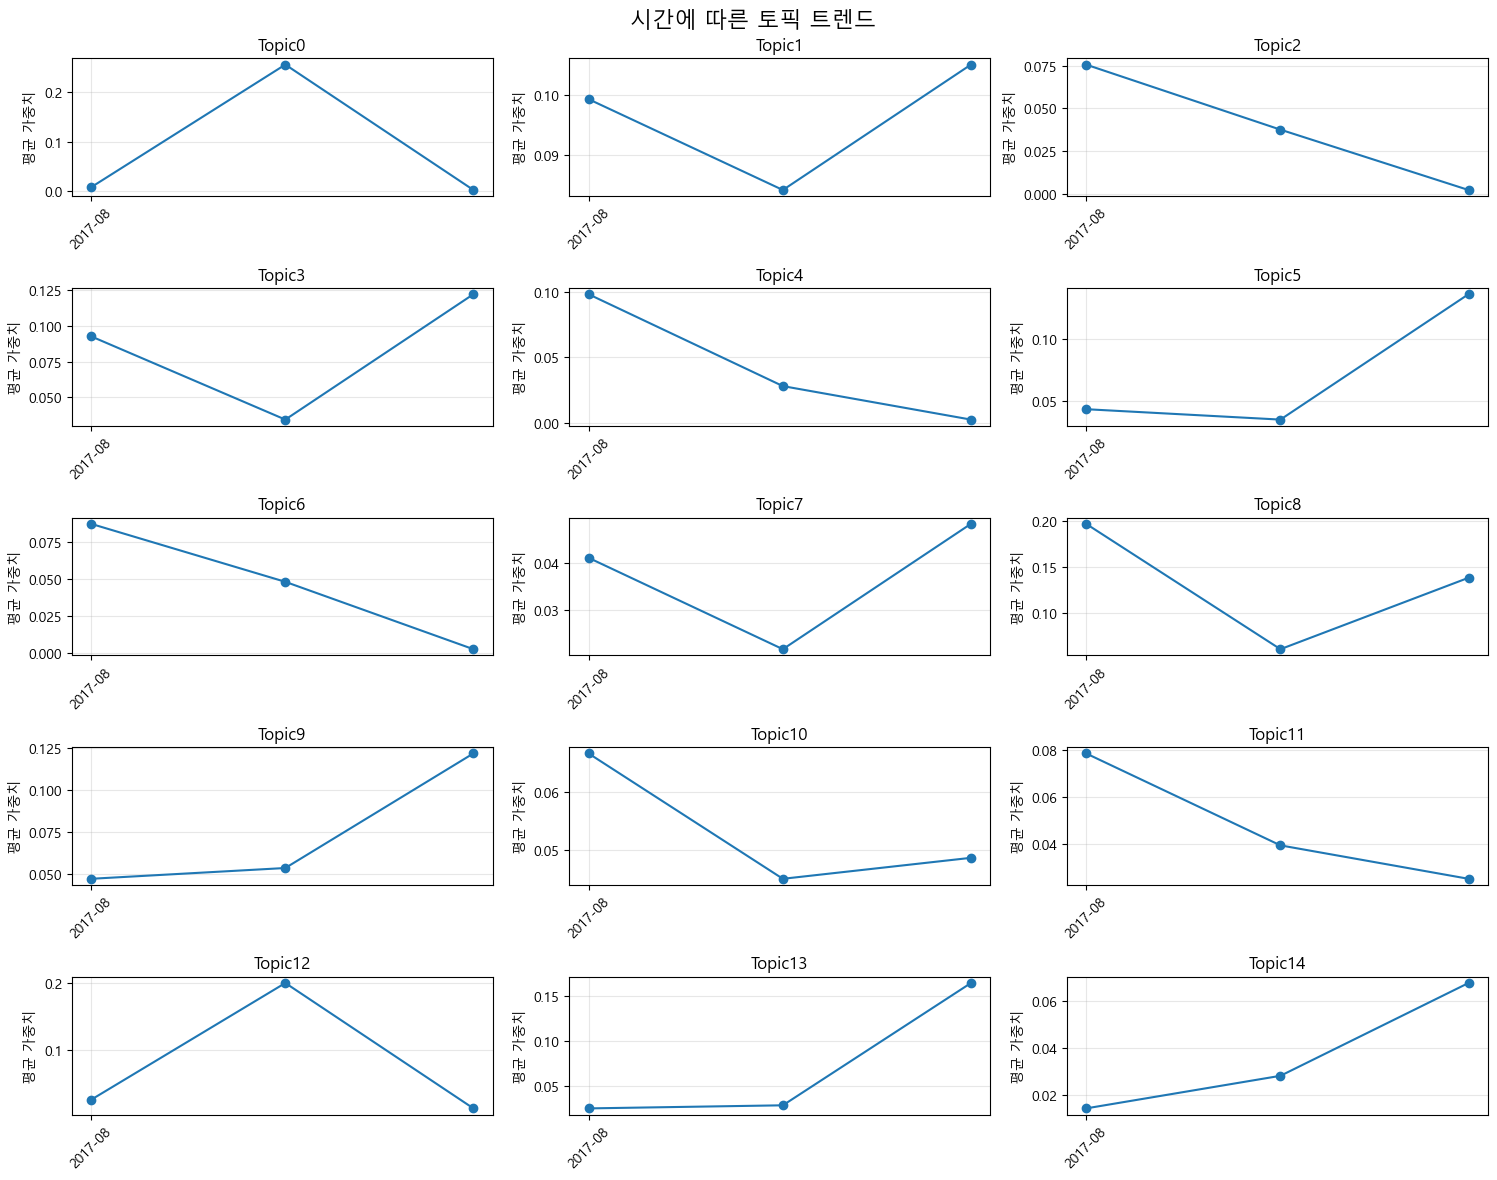

In [41]:
# 기간별 평균 토픽 가중치 계산
trend = trend_data.groupby('period').mean()

print("\n기간별 토픽 분포:")
print(trend.head())

# 시간 트렌드 시각화
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig, axes = plt.subplots(5, 3, figsize=(15, 12))
fig.suptitle('시간에 따른 토픽 트렌드', fontsize=16)

# x축을 datetime으로 변환
trend.index = pd.to_datetime(trend.index)
trend_sorted = trend.sort_index()

for idx, (ax, topic) in enumerate(zip(axes.flat, topic_columns)):
    ax.plot(trend_sorted.index, trend_sorted[topic], marker='o')
    ax.set_title(topic)
    ax.set_ylabel('평균 가중치')
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()